STEP 1: Import required libraries

numpy  -> numerical computations

pandas -> dataset creation and manipulation

 sklearn.model_selection -> train-test split

 sklearn.linear_model -> Linear Regression model

 sklearn.metrics -> model evaluation



In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


STEP 2: Create a simple House Price dataset manually

 Dataset has:

 40 rows (samples)

 4 input features + 1 target column
 
 Values are kept realistic but simple

In [2]:
data = {
    "Area_sqft": [
        600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050,
        1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550,
        1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2050,
        2100, 2150, 2200, 2250, 2300, 2350, 2400, 2450, 2500, 2550
    ],

    "Bedrooms": [
        1,1,1,2,2,2,2,2,2,2,
        3,3,3,3,3,3,3,3,3,3,
        4,4,4,4,4,4,4,4,4,4,
        5,5,5,5,5,5,5,5,5,5
    ],

    "Age": [
        20,18,17,16,15,14,13,12,11,10,
        9,8,8,7,7,6,6,5,5,4,
        4,4,3,3,3,2,2,2,2,1,
        1,1,1,1,1,1,1,1,1,1
    ],

    "Distance_km": [
        15,14,14,13,13,12,12,11,11,10,
        10,9,9,8,8,7,7,6,6,5,
        5,5,4,4,4,3,3,3,3,2,
        2,2,2,2,2,2,2,2,2,2
    ],

    "Price_lakhs": [
        30,32,34,36,38,40,42,45,48,50,
        52,55,58,60,63,65,68,70,72,75,
        78,80,83,85,88,90,93,95,98,100,
        105,108,110,113,115,118,120,123,125,128
    ]
}
df =pd.DataFrame(data)
print("Dataset shape",df.shape)
df.head()


Dataset shape (40, 5)


,Area_sqft,Bedrooms,Age,Distance_km,Price_lakhs
0,600,1,20,15,30
1,650,1,18,14,32
2,700,1,17,14,34
3,750,2,16,13,36
4,800,2,15,13,38


STEP 3: Separate Features (X) and Target (y)

 X -> Independent variables (first 4 columns)

 y -> Dependent variable (Price)


In [3]:
X = df.drop("Price_lakhs", axis=1)
y = df["Price_lakhs"]

print("Feature Matrix Shape", X.shape)
print("Target Vector Shape", y.shape)


Feature Matrix Shape (40, 4)
Target Vector Shape (40,)


 STEP 4: Split dataset into Training and Testing sets
 
  80% data -> training

20% data -> testing


random_state ensures same split every time

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Training data size", X_train.shape)
print("Testing data size", X_test.shape)

Training data size (32, 4)
Testing data size (8, 4)


In [ ]:
# STEP 5: Create Linear Regression Model
model = LinearRegression()

STEP 6: Train the model

Model learns the relationship between house features and price

In [ ]:

model.fit(X_train, y_train)
print("Model training completed successfully.")


Model training completed successfully.


STEP 7: View learned parameters

 intercept_ -> base price

 coef_ -> importance of each feature

In [ ]:

print("Intercept:", model.intercept_)

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

coefficients

Intercept: -12.075145336161455


,Feature,Coefficient
0,Area_sqft,0.053107
1,Bedrooms,0.942638
2,Age,0.625800
3,Distance_km,-0.231465


STEP 8: Predict house prices for test data

In [8]:
y_pred = model.predict(X_test)
comparison = pd.DataFrame({
    "Actual Price": y_test.values,
    "Predicted Price": y_pred
})

comparison


,Actual Price,Predicted Price
0,75,74.414419
1,68,67.237044
2,65,64.581697
3,93,93.155822
4,38,38.673640
5,58,57.404322
6,123,122.912950
7,95,95.811169


STEP 9: Evaluate model performance

 Lower MAE, MSE, RMSE -> better model

 R² closer to 1 -> good fit

In [9]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE) :", mse)
print("Root Mean Squared Error  :", rmse)
print("R-squared (R²)           :", r2)


Mean Absolute Error (MAE): 0.5112748521431429
Mean Squared Error (MSE) : 0.32480756738822636
Root Mean Squared Error  : 0.5699189129939682
R-squared (R²)           : 0.9994594283106788


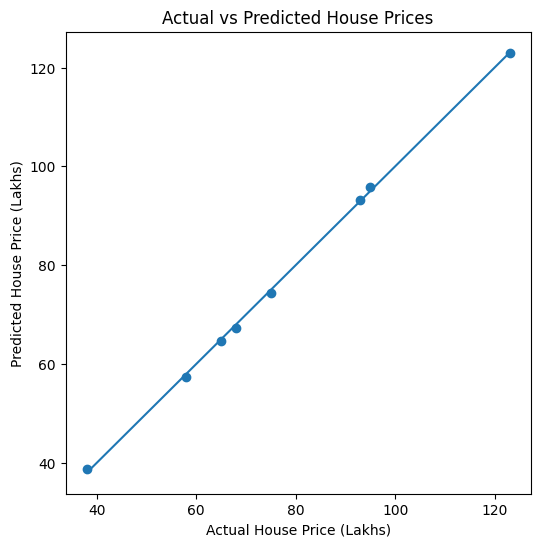

In [13]:
# STEP 10: Visualize Actual vs Predicted Prices
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Price (Lakhs)")
plt.ylabel("Predicted House Price (Lakhs)")
plt.title("Actual vs Predicted House Prices")
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()]
)

plt.show()